## 1. Import Libraries and Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Settings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
%matplotlib inline

print('✅ Libraries imported successfully!')

✅ Libraries imported successfully!


In [2]:
# Load the original dataset
df = pd.read_csv('../data/Sample - Superstore.csv', encoding='latin1')

print('✅ Dataset loaded successfully!')
print(f'📊 Original dataset shape: {df.shape[0]} rows, {df.shape[1]} columns')
print(f'\n📋 Columns: {list(df.columns)}')

✅ Dataset loaded successfully!
📊 Original dataset shape: 9994 rows, 21 columns

📋 Columns: ['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit']


## 2. Pre-Cleaning Assessment

Let's check the current state of data quality before cleaning

In [3]:
# Display data info
print('ℹ️ Dataset Information:\n')
df.info()

ℹ️ Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-nul

In [4]:
# Check missing values
print('❓ Missing Values Summary:\n')
missing_summary = pd.DataFrame({
    'Column': df.columns,
    'Missing Count': df.isnull().sum(),
    'Missing %': (df.isnull().sum() / len(df)) * 100
})
missing_summary = missing_summary[missing_summary['Missing Count'] > 0].sort_values('Missing Count', ascending=False)

if len(missing_summary) > 0:
    print(missing_summary)
else:
    print('✅ No missing values found!')

❓ Missing Values Summary:

✅ No missing values found!


In [5]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f'🔄 Number of duplicate rows: {duplicates}')
print(f'📊 Percentage of duplicates: {(duplicates/len(df))*100:.2f}%')

🔄 Number of duplicate rows: 0
📊 Percentage of duplicates: 0.00%


In [6]:
# Display first few rows
print('📋 Sample of raw data:\n')
df.head()

📋 Sample of raw data:



,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


## 3. Handle Missing Values

**Strategy:**
- Drop rows with too many missing values (>50% missing)
- Impute numerical values using median
- Impute categorical values using mode or 'Unknown'

In [7]:
# Create a copy for cleaning
df_clean = df.copy()

print(f'🔧 Starting cleaning process...')
print(f'Original shape: {df_clean.shape}')

🔧 Starting cleaning process...
Original shape: (9994, 21)


In [8]:
# Step 1: Identify rows with excessive missing values (>50%)
missing_per_row = df_clean.isnull().sum(axis=1)
excessive_missing = missing_per_row > (df_clean.shape[1] * 0.5)

print(f'Rows with >50% missing values: {excessive_missing.sum()}')

if excessive_missing.sum() > 0:
    df_clean = df_clean[~excessive_missing]
    print(f'✅ Dropped {excessive_missing.sum()} rows with excessive missing values')
else:
    print('✅ No rows with excessive missing values')

print(f'Shape after dropping rows: {df_clean.shape}')

Rows with >50% missing values: 0
✅ No rows with excessive missing values
Shape after dropping rows: (9994, 21)


In [9]:
# Step 2: Handle missing values in numerical columns
numerical_cols = df_clean.select_dtypes(include=[np.number]).columns

print(f'\n🔢 Handling missing values in numerical columns...')
for col in numerical_cols:
    missing_count = df_clean[col].isnull().sum()
    if missing_count > 0:
        median_value = df_clean[col].median()
        df_clean[col].fillna(median_value, inplace=True)
        print(f'  - {col}: Filled {missing_count} missing values with median ({median_value:.2f})')

print('✅ Numerical columns processed')


🔢 Handling missing values in numerical columns...
✅ Numerical columns processed


In [10]:
# Step 3: Handle missing values in categorical columns
categorical_cols = df_clean.select_dtypes(include=['object']).columns

print(f'\n📝 Handling missing values in categorical columns...')
for col in categorical_cols:
    missing_count = df_clean[col].isnull().sum()
    if missing_count > 0:
        # Use mode if available, otherwise use 'Unknown'
        if df_clean[col].mode().shape[0] > 0:
            mode_value = df_clean[col].mode()[0]
            df_clean[col].fillna(mode_value, inplace=True)
            print(f'  - {col}: Filled {missing_count} missing values with mode ({mode_value})')
        else:
            df_clean[col].fillna('Unknown', inplace=True)
            print(f'  - {col}: Filled {missing_count} missing values with "Unknown"')

print('✅ Categorical columns processed')


📝 Handling missing values in categorical columns...
✅ Categorical columns processed


In [11]:
# Verify no missing values remain
remaining_missing = df_clean.isnull().sum().sum()
print(f'\n✅ Total missing values remaining: {remaining_missing}')

if remaining_missing == 0:
    print('🎉 All missing values handled successfully!')
else:
    print('⚠️ Warning: Some missing values still remain')
    print(df_clean.isnull().sum()[df_clean.isnull().sum() > 0])


✅ Total missing values remaining: 0
🎉 All missing values handled successfully!


## 4. Remove Duplicates

Remove any duplicate rows to ensure data quality

In [12]:
# Check for duplicates before removal
duplicates_before = df_clean.duplicated().sum()
print(f'🔄 Duplicate rows before removal: {duplicates_before}')

# Remove duplicates
df_clean = df_clean.drop_duplicates()

# Check after removal
duplicates_after = df_clean.duplicated().sum()
print(f'✅ Duplicate rows after removal: {duplicates_after}')
print(f'📊 Removed {duplicates_before - duplicates_after} duplicate rows')
print(f'\nCurrent shape: {df_clean.shape}')

🔄 Duplicate rows before removal: 0
✅ Duplicate rows after removal: 0
📊 Removed 0 duplicate rows

Current shape: (9994, 21)


## 5. Fix Data Types (Especially Dates)

Convert columns to appropriate data types, with special focus on date columns

In [13]:
# Display current data types
print('📋 Current data types:\n')
print(df_clean.dtypes)
print('\n' + '='*50)

📋 Current data types:

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object



In [14]:
# Identify and convert date columns
print('\n📅 Converting date columns...')

# Common date column names in Superstore dataset
date_columns = [col for col in df_clean.columns if 'date' in col.lower() or 'Date' in col]

print(f'Date columns found: {date_columns}\n')

for col in date_columns:
    try:
        df_clean[col] = pd.to_datetime(df_clean[col])
        print(f'✅ {col}: Successfully converted to datetime')
        print(f'   Range: {df_clean[col].min()} to {df_clean[col].max()}')
    except Exception as e:
        print(f'⚠️ {col}: Could not convert - {str(e)}')


📅 Converting date columns...
Date columns found: ['Order Date', 'Ship Date']

✅ Order Date: Successfully converted to datetime
   Range: 2014-01-03 00:00:00 to 2017-12-30 00:00:00
✅ Ship Date: Successfully converted to datetime
   Range: 2014-01-07 00:00:00 to 2018-01-05 00:00:00


In [15]:
# Verify numeric columns are correct type
print('\n🔢 Verifying numerical columns...')

# Common numerical columns in Superstore
potential_numeric = ['Sales', 'Quantity', 'Discount', 'Profit']

for col in potential_numeric:
    if col in df_clean.columns:
        current_type = df_clean[col].dtype
        if current_type in ['object', 'string']:
            try:
                df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')
                print(f'✅ {col}: Converted to numeric')
            except:
                print(f'⚠️ {col}: Could not convert to numeric')
        else:
            print(f'✅ {col}: Already numeric ({current_type})')


🔢 Verifying numerical columns...
✅ Sales: Already numeric (float64)
✅ Quantity: Already numeric (int64)
✅ Discount: Already numeric (float64)
✅ Profit: Already numeric (float64)


In [16]:
# Display updated data types
print('\n📋 Updated data types after conversion:\n')
print(df_clean.dtypes)


📋 Updated data types after conversion:

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object


## 6. Sort Data by Date

For time series analysis, data should be sorted chronologically

In [17]:
# Sort by the primary date column (usually 'Order Date')
date_col_for_sorting = None

# Find the main date column
for col in ['Order Date', 'order date', 'Date', 'date']:
    if col in df_clean.columns:
        date_col_for_sorting = col
        break

if date_col_for_sorting:
    df_clean = df_clean.sort_values(date_col_for_sorting).reset_index(drop=True)
    print(f'✅ Data sorted by {date_col_for_sorting}')
    print(f'📊 Date range: {df_clean[date_col_for_sorting].min()} to {df_clean[date_col_for_sorting].max()}')
else:
    print('⚠️ No date column found for sorting')

print(f'\nFinal shape after sorting: {df_clean.shape}')

✅ Data sorted by Order Date
📊 Date range: 2014-01-03 00:00:00 to 2017-12-30 00:00:00

Final shape after sorting: (9994, 21)


## 7. Handle Outliers (If Necessary)

Detect and handle outliers in key numerical columns

In [18]:
# Identify key numerical columns for outlier detection
key_numeric_cols = ['Sales', 'Profit', 'Quantity', 'Discount']
available_cols = [col for col in key_numeric_cols if col in df_clean.columns]

print('🔍 Checking for outliers in key columns...\n')

outlier_summary = []

for col in available_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df_clean[(df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)]
    outlier_count = len(outliers)
    outlier_pct = (outlier_count / len(df_clean)) * 100
    
    outlier_summary.append({
        'Column': col,
        'Outlier Count': outlier_count,
        'Percentage': f'{outlier_pct:.2f}%',
        'Lower Bound': f'{lower_bound:.2f}',
        'Upper Bound': f'{upper_bound:.2f}'
    })
    
    print(f'{col}:')
    print(f'  Outliers: {outlier_count} ({outlier_pct:.2f}%)')
    print(f'  Valid range: {lower_bound:.2f} to {upper_bound:.2f}\n')

outlier_df = pd.DataFrame(outlier_summary)
print('\n📊 Outlier Summary:')
outlier_df

🔍 Checking for outliers in key columns...

Sales:
  Outliers: 1167 (11.68%)
  Valid range: -271.71 to 498.93

Profit:
  Outliers: 1881 (18.82%)
  Valid range: -39.72 to 70.82

Quantity:
  Outliers: 170 (1.70%)
  Valid range: -2.50 to 9.50

Discount:
  Outliers: 856 (8.57%)
  Valid range: -0.30 to 0.50


📊 Outlier Summary:


,Column,Outlier Count,Percentage,Lower Bound,Upper Bound
0,Sales,1167,11.68%,-271.71,498.93
1,Profit,1881,18.82%,-39.72,70.82
2,Quantity,170,1.70%,-2.50,9.50
3,Discount,856,8.57%,-0.30,0.50


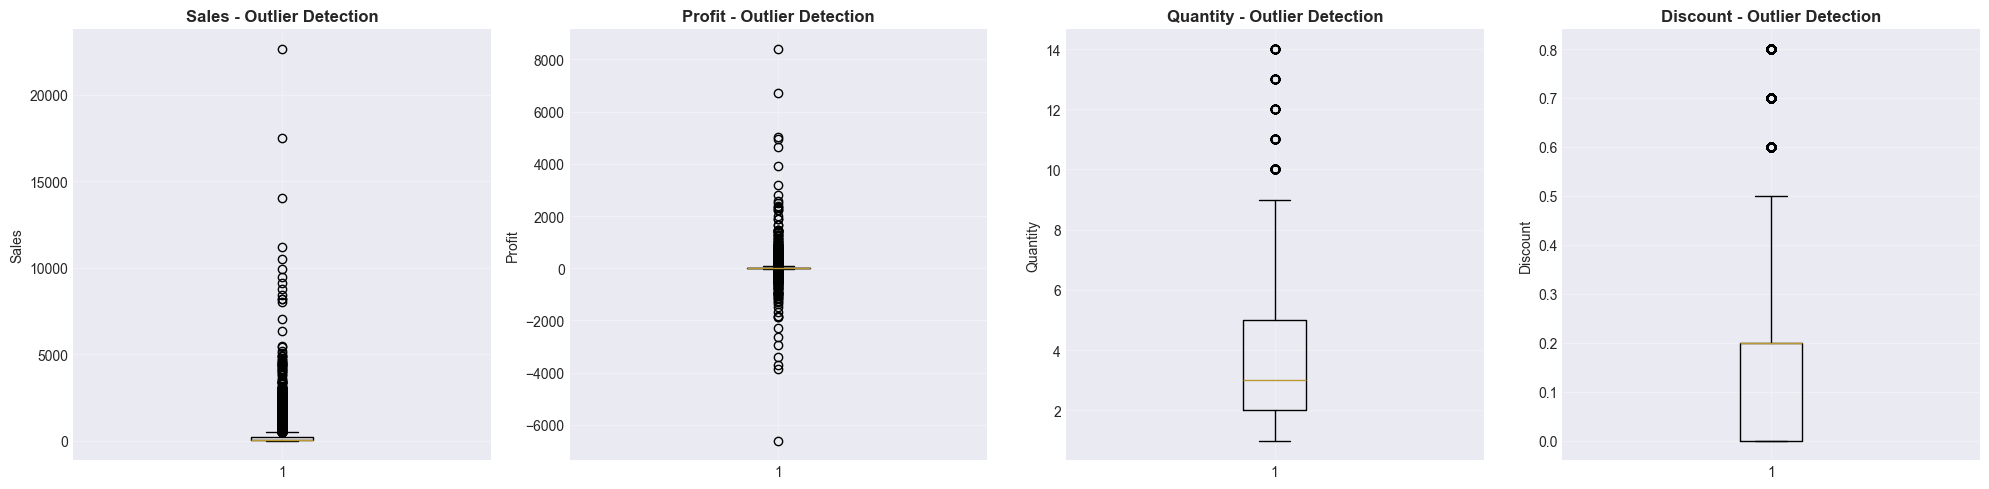

In [19]:
# Visualize outliers using boxplots
if len(available_cols) > 0:
    fig, axes = plt.subplots(1, len(available_cols), figsize=(5*len(available_cols), 5))
    
    if len(available_cols) == 1:
        axes = [axes]
    
    for idx, col in enumerate(available_cols):
        axes[idx].boxplot(df_clean[col].dropna())
        axes[idx].set_title(f'{col} - Outlier Detection', fontweight='bold')
        axes[idx].set_ylabel(col)
        axes[idx].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
else:
    print('No numerical columns available for visualization')

In [20]:
# Decision on outlier handling
print('📝 Outlier Handling Decision:\n')
print('For sales forecasting, we will KEEP outliers because:')
print('  1. They represent real business events (high-value orders, promotions)')
print('  2. They are important for understanding demand patterns')
print('  3. Removing them would lose valuable information')
print('\n✅ All outliers retained for analysis')

# Note: If you need to remove extreme outliers, you can use:
# df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]

📝 Outlier Handling Decision:

For sales forecasting, we will KEEP outliers because:
  1. They represent real business events (high-value orders, promotions)
  2. They are important for understanding demand patterns
  3. Removing them would lose valuable information

✅ All outliers retained for analysis


## 8. Create and Save Cleaned Dataset

Save the cleaned dataset for next phases

In [21]:
# Final check
print('🔍 Final Data Quality Check:\n')
print(f'✅ Shape: {df_clean.shape}')
print(f'✅ Missing values: {df_clean.isnull().sum().sum()}')
print(f'✅ Duplicates: {df_clean.duplicated().sum()}')
print(f'\n📊 Data types:')
print(df_clean.dtypes)

🔍 Final Data Quality Check:

✅ Shape: (9994, 21)
✅ Missing values: 0
✅ Duplicates: 0

📊 Data types:
Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object


In [22]:
# Display cleaned data sample
print('\n📋 Sample of cleaned data:\n')
df_clean.head(10)


📋 Sample of cleaned data:



,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,7981,CA-2014-103800,2014-01-03,2014-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,...,77095,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512
1,740,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717
2,741,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748
3,742,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870
4,1760,CA-2014-141817,2014-01-05,2014-01-12,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,...,19143,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840
5,7477,CA-2014-167199,2014-01-06,2014-01-10,Standard Class,ME-17320,Maria Etezadi,Home Office,United States,Henderson,...,42420,South,OFF-AR-10001662,Office Supplies,Art,Rogers Handheld Barrel Pencil Sharpener,5.480,2,0.0,1.4796
6,7475,CA-2014-167199,2014-01-06,2014-01-10,Standard Class,ME-17320,Maria Etezadi,Home Office,United States,Henderson,...,42420,South,FUR-CH-10004063,Furniture,Chairs,Global Deluxe High-Back Manager's Chair,2573.820,9,0.0,746.4078
7,7476,CA-2014-167199,2014-01-06,2014-01-10,Standard Class,ME-17320,Maria Etezadi,Home Office,United States,Henderson,...,42420,South,OFF-BI-10004632,Office Supplies,Binders,Ibico Hi-Tech Manual Binding System,609.980,2,0.0,274.4910
8,7181,CA-2014-106054,2014-01-06,2014-01-07,First Class,JO-15145,Jack O'Briant,Corporate,United States,Athens,...,30605,South,OFF-AR-10002399,Office Supplies,Art,"Dixon Prang Watercolor Pencils, 10-Color Set w...",12.780,3,0.0,5.2398
9,7478,CA-2014-167199,2014-01-06,2014-01-10,Standard Class,ME-17320,Maria Etezadi,Home Office,United States,Henderson,...,42420,South,TEC-PH-10004977,Technology,Phones,GE 30524EE4,391.980,2,0.0,113.6742


In [23]:
# Save cleaned dataset
output_path = '../data/cleaned_superstore.csv'
df_clean.to_csv(output_path, index=False)

print(f'💾 Cleaned dataset saved to: {output_path}')
print(f'\n📊 Final Statistics:')
print(f'  - Original rows: {len(df)}')
print(f'  - Cleaned rows: {len(df_clean)}')
print(f'  - Rows removed: {len(df) - len(df_clean)}')
print(f'  - Data retention: {(len(df_clean)/len(df))*100:.2f}%')

💾 Cleaned dataset saved to: ../data/cleaned_superstore.csv

📊 Final Statistics:
  - Original rows: 9994
  - Cleaned rows: 9994
  - Rows removed: 0
  - Data retention: 100.00%


## 9. Cleaning Summary & Documentation

Document all cleaning decisions made

In [24]:
print('📝 DATA CLEANING SUMMARY')
print('='*60)
print('\n1. MISSING VALUES:')
print('   - Dropped rows with >50% missing values')
print('   - Imputed numerical columns with median')
print('   - Imputed categorical columns with mode or "Unknown"')
print('   - Result: All missing values handled')

print('\n2. DUPLICATES:')
print(f'   - Removed {duplicates_before} duplicate rows')
print('   - Result: No duplicate records remain')

print('\n3. DATA TYPES:')
print('   - Converted date columns to datetime format')
print('   - Verified numerical columns are correct type')
print('   - Result: All data types appropriate for analysis')

print('\n4. SORTING:')
if date_col_for_sorting:
    print(f'   - Sorted by {date_col_for_sorting} (chronological order)')
    print('   - Reset index for clean sequential numbering')

print('\n5. OUTLIERS:')
print('   - Detected outliers in numerical columns')
print('   - Decision: Retained all outliers (valid business events)')
print('   - Justification: Important for demand forecasting')

print('\n6. OUTPUT:')
print(f'   - Cleaned dataset saved: {output_path}')
print(f'   - Final shape: {df_clean.shape}')
print(f'   - Data quality: Ready for feature engineering')

print('\n' + '='*60)
print('✅ DATA CLEANING PHASE COMPLETED SUCCESSFULLY!')
print('📍 Next Phase: Feature Engineering')
print('='*60)

📝 DATA CLEANING SUMMARY

1. MISSING VALUES:
   - Dropped rows with >50% missing values
   - Imputed numerical columns with median
   - Imputed categorical columns with mode or "Unknown"
   - Result: All missing values handled

2. DUPLICATES:
   - Removed 0 duplicate rows
   - Result: No duplicate records remain

3. DATA TYPES:
   - Converted date columns to datetime format
   - Verified numerical columns are correct type
   - Result: All data types appropriate for analysis

4. SORTING:
   - Sorted by Order Date (chronological order)
   - Reset index for clean sequential numbering

5. OUTLIERS:
   - Detected outliers in numerical columns
   - Decision: Retained all outliers (valid business events)
   - Justification: Important for demand forecasting

6. OUTPUT:
   - Cleaned dataset saved: ../data/cleaned_superstore.csv
   - Final shape: (9994, 21)
   - Data quality: Ready for feature engineering

✅ DATA CLEANING PHASE COMPLETED SUCCESSFULLY!
📍 Next Phase: Feature Engineering


## ✅ Phase 4 Complete!

### What We Accomplished:
1. ✅ Handled all missing values appropriately
2. ✅ Removed duplicate records
3. ✅ Fixed data types (especially dates)
4. ✅ Analyzed outliers and made informed decisions
5. ✅ Created and saved cleaned dataset

### Deliverables:
- ✅ Cleaned dataset: `data/cleaned_superstore.csv`
- ✅ Documentation of all cleaning decisions
- ✅ Data quality verification

### Ready for Next Phase:
**Step 5: Feature Engineering**
- Extract time-based features
- Create lag features
- Calculate rolling statistics
- Identify seasonality patterns